# Taller ASP - Daniel Crovo - Deep Learning
**Objetivos**
- Predecir los valores futuros de una serie temporal haciendo uso de técnicas de Deep Learning.
- Implementar la optimización de hiperparámetros y cuantificar el efecto a través de métricas de desempeño.

En el ámbito de la ingenierı́a eléctrica, uno de los principales desafı́os es la planificación y gestión eficiente de la producción de energı́a eléctrica. La potencia activa es una medida de la energı́a eléctrica que se consume o se produce en un sistema eléctrico en un momento dado, y su estimación precisa es esencial para garantizar que la producción de energı́a eléctrica se ajuste a la demanda en tiempo real. Además, la potencia activa es uno de los factores clave que determinan la estabilidad y la calidad de la energı́a eléctrica suministrada a los consumidores. Por lo anterior, la predicción de la potencia activa global que se espera que se consuma o produzca en las próximas 24 horas es un problema crı́tico en la planificación y gestión de la producción de energı́a eléctrica. Una solución precisa y confiable para este problema puede ayudar a mejorar la eficiencia y la estabilidad de la red eléctrica, ası́ como a reducir los costos y las emisiones de gases de efecto invernadero asociados con la producción de energı́a eléctrica.

## Preprocesamiento de los datos

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/data_asp.csv')
data.head()

,Fecha,Hora,Potencia Activa Global (W)
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [52]:
# Renombrar columnas y concatenar Fecha y Hora para utilizarlas como index
data.rename(columns={'Potencia Activa Global (W)':'Power'}, inplace=True) 
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')
data['Datetime'] = data['Fecha'] +" "+ data['Hora']     
data['Datetime'] = pd.to_datetime(data['Datetime'], dayfirst=True)

# Se eliminan las columnas pues ya no se requieren
data.drop(['Fecha', 'Hora'], axis=1,inplace=True)
data.set_index('Datetime', inplace=True)
data.head()

,Power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [53]:
# Se verifica información básica del dataset
data.describe()

,Power
count,2.049280e+06
mean,1.091615e+00
std,1.057294e+00
min,7.600000e-02
25%,3.080000e-01
50%,6.020000e-01
75%,1.528000e+00
max,1.112200e+01


In [57]:
# Las siguientes lineas de código se utilizarn para verificar cómo están distribuidos los datos núlos

# grouped = data.groupby(by=data.index.month)
# nan = data[pd.isna(data['Power'])]
# nan = nan.fillna(1)
# nan_values = nan.groupby(by=[nan.index.month,nan.index.day,nan.index.year]).count()

data[pd.isna(data['Power'])].size

25979

Existen 25979 datos nulos, los cuales se van a reemplazar por el valor de la media.

In [58]:
data.fillna(data['Power'].mean(), inplace=True)

In [59]:
# Se verifica que no queden valores nulos
data[pd.isna(data['Power'])].size

0

<Axes: xlabel='Datetime', ylabel='Power'>

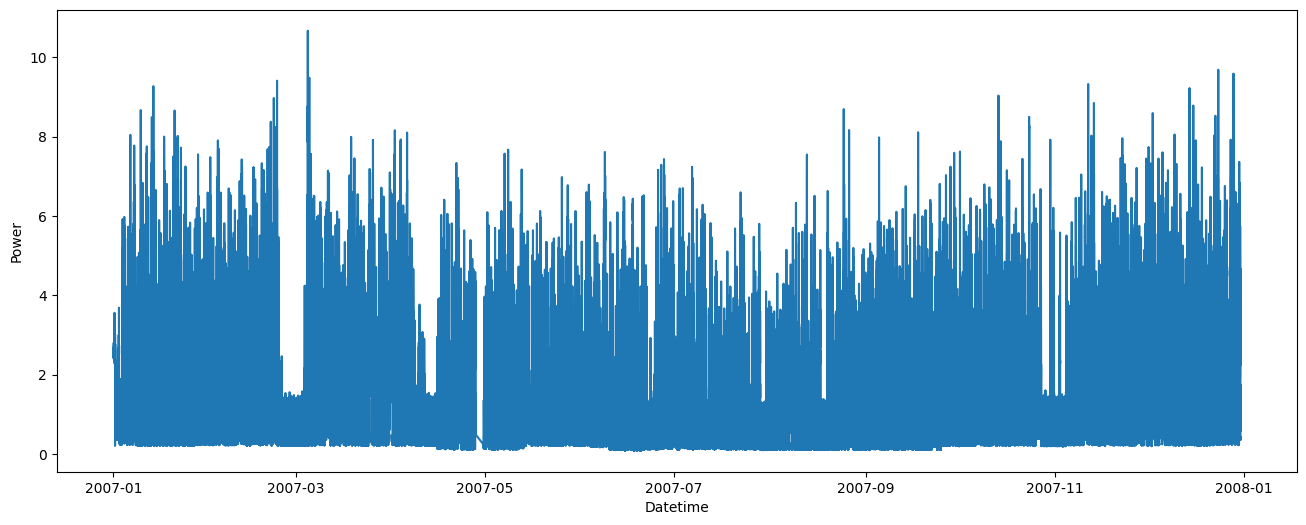

In [56]:
plt.figure(figsize=(16,6))
sns.lineplot(data.query("Datetime>='2007-01-01' & Datetime<= '2007-12-31'"), x='Datetime', y='Power')

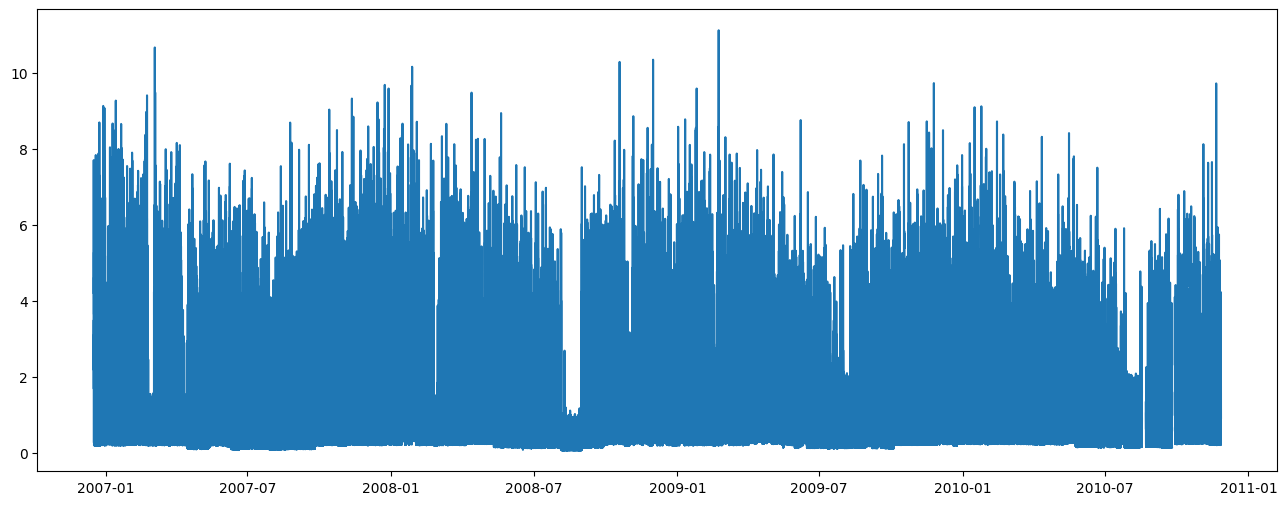

In [34]:
plt.figure(figsize=(16,6))
plt.plot(data, )

In [5]:
from torch.utils.data import Dataset
import os 
import numpy as np

class APData(Dataset): 
    def __init__(self, file_path, transform = None):
        self.path = file_path
        self.transform = transform
        
        
